___

# Siniestralidad Vial en la ciudad de Bogota 
# (2017 - 2018)



## Introducción

Este proyecto trata sobre el análisis de los siniestros viales en la ciudad de Bogotá para los años 2017-2018, enfocandoce en visualizaciones espaciales, haciendo uso de la libreria Geopandas y de visualizaciones de mapas interactivos con la libreria Folium de Leaflet

Los dataset encontrados se obtuvieron de www.datosabiertos.bogota.gov.co 


In [0]:
import numpy as np
import pandas as pd
# LIBRERIAS DE MATPLOTLIB
import matplotlib.pyplot as plt
%matplotlib inline
from random import sample
#%matplotlib inline # --> MATPLOTLIB AVANZADO
#from matplotlib import ticker # --> NOTACION CIENTIFICA
import matplotlib.gridspec as gridspec # --> FIGURAS MULTIPLES
from mpl_toolkits.mplot3d.axes3d import Axes3D # --> FIGURAS 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

from scipy import stats # --> ECUACION REGRESION LINEAL

#  LIBRERIAS Plotly y Cufflinks
!pip install plotly==3.10.0
!pip install cufflinks==0.16 OK
!pip install plotly
!pip install cufflinks

import cufflinks as cf
print(cf.__version__)
# cf version 0.17.0 OK
import plotly
plotly.__version__
# Plotly 4.4.1 OK

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.set_config_file(offline=True)

  
  ### LIBRERIAS BOKEN 
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show, output_file, save, reset_output
output_notebook()
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6

## INSTALACION DEL LIBRERIAS MAPA
import folium ,json
import branca.colormap as cm  ##sirve para ayudarnos a meter HTML en los popup de los marcadores. Sin ello solo he conseguido ver texto plano.
from folium.plugins import FastMarkerCluster   ## pluglins 
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import branca.colormap as cm
import seaborn as sns
###############   MAPA DE CALOR  O COROPLETICO ##########
import os
import geopandas as gpd
import IPython.display as display
import ogr                           # GDAL/OGR
import shapely                       # Herramientas para manipulación geométrica
from shapely.geometry import *
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import vincent ## graficos en los puntos de mapa dinamico
from folium.plugins import Search
%matplotlib inline

In [0]:
###### LIBRERIAS GEOPANDAS
!sudo apt install libspatialindex-dev  ## permite permisos de super usuario
!pip install geopandas
!pip install descartes
# INSTALACIÓN FIONA PARA SUBIR GOEJSON
!pip install Fiona==1.8.4
!apt-get install ca-certificates

!pip install pysal==1.14.4.post2
!pip install mapclassify==2.0.1
## INSTALACION FOLIUM
!pip install folium

!pip install vincent ## para usar vicent y pasar graficos a los popup

In [0]:
#VERIFICACION DE LA VERSION FOLIUM
folium.__version__


'0.8.3'

Un dato interesante es saber la distribución horaria de accidentes

Text(0, 0.5, 'Cantidad')

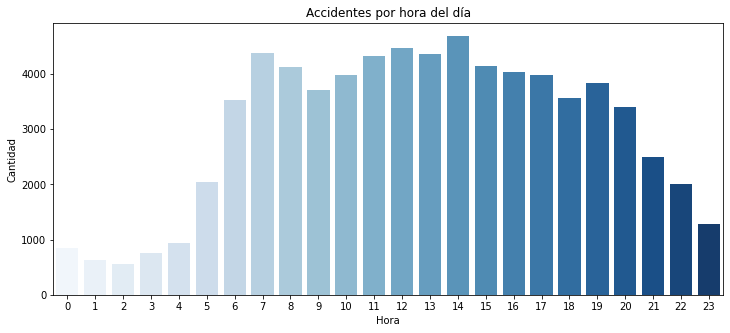

In [0]:
plt.figure(figsize=(12,5))
g2 = sns.countplot(x='HORA', data=df_siniestros, palette='Blues' )
g2.set_title('Accidentes por hora del día')
g2.set_xlabel('Hora')
g2.set_ylabel('Cantidad')

Aquí se visualiza la cantidad de accidentes por medio de transporte

Text(0, 0.5, 'CANTIDAD DE ACCIDENTES')

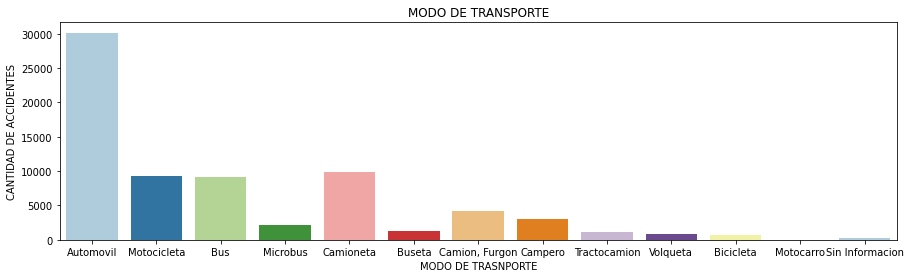

Distribución de edad de los conductores del actor vial 1 y 2

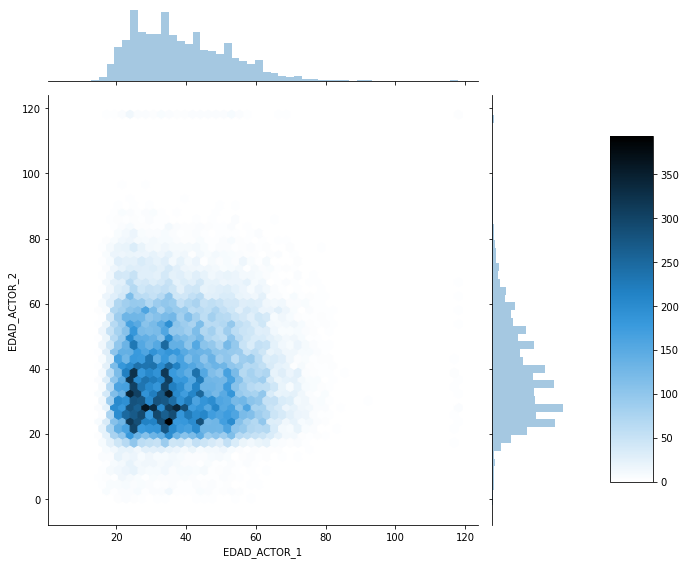

In [0]:
g6 = sns.jointplot(x=df_siniestros["EDAD_ACTOR_1"], y=df_siniestros["EDAD_ACTOR_2"], kind="hex", height=12)
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # reducimos el tamaño de la figura original para darle espacio al colorBar
cbar_ax = g6.fig.add_axes([.85, .25, .05, .4])  # Constriumos un nuevo "axe" para el colorBar (x, y, ancho, alto)
plt.colorbar(cax=cbar_ax)
plt.show()

Número de accidentes por días de la semana

In [0]:
plt.figure(figsize=(10,5))
configure_plotly_browser_state()
df_hipotesis['DIA SEMANA'].iplot(kind='hist',bins=10)

<Figure size 720x360 with 0 Axes>

MAPA COROPLETICO O MAPA DE CALOR

En la ciudad de Bogotá  se presentan al rededor de 2000 casos anuales. 
En el siguiente mapa de calor podremos visualizar la localidad con mayor número de accidentes. (Es importante aclarar que los datos son tipo Geojson)

In [0]:
# Se carga los datos en formato Geojson
localidad_bogota = gpd.read_file('Loc_Bog.geojson')
localidad_bogota.geometry.name
localidad_bogota.head(3) 

CMIULOCAL  ...                                           geometry
0        09  ...  POLYGON ((-74.15857 4.66274, -74.15848 4.66279...
1        10  ...  POLYGON ((-74.15547 4.71798, -74.15547 4.71798...
2        11  ...  POLYGON ((-74.03450 4.82547, -74.03478 4.82418...

[3 rows x 6 columns]

El mapa de calor enseña en tonos amarillos las zonas donde más accidentes se presentan. Como se puede observar la localidad con mayor accidentalidad es Kennedy, esto debido a que en esta localidad se encuentra la central mayorista de abastos, motivo por el que se presenta alto flujo de transporte. 

En tonos azules se muestran las localidades con menos accidentalidad.
Finalmente al observar el mapa se puede concluir que al norte de la ciudad es donde más se presentan siniestros viales. 

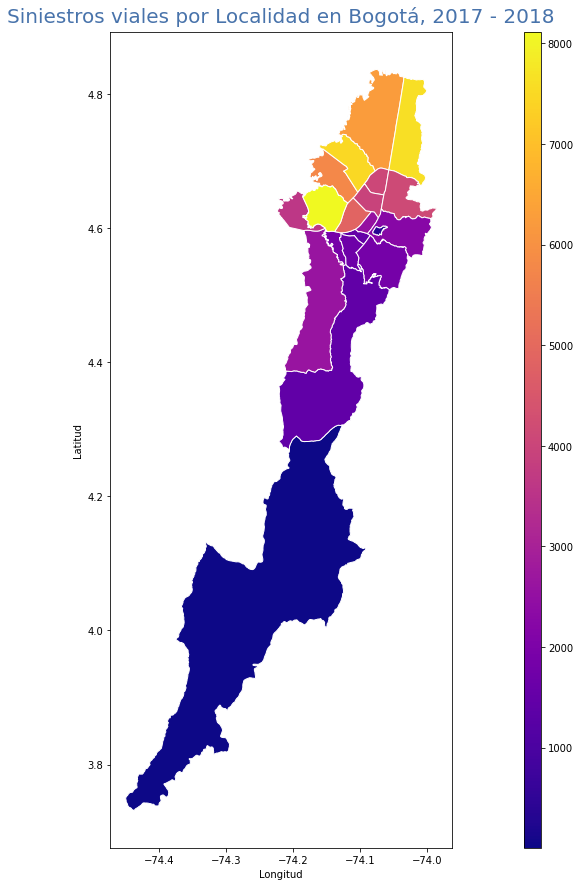

In [0]:
fig, ax = plt.subplots(1, 1, figsize=( 15, 15)) 
ax.set_title('Siniestros viales por Localidad en Bogotá, 2017 - 2018', 
             pad = 10, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

divider = make_axes_locatable(ax)

# MAPAS INTERACTIVOS
Ahora estamos interesados el saber en número de muertos, heridos e ilesos por localidad.

In [0]:
## Visualizamos la información del archivo
df_loc.head(20)

ID_LOCALIDAD           LOCALIDAD  ...   LATITUD   LONGITUD
0              1             USAQUEN  ...  4.694969 -74.031093
1              2           CHAPINERO  ...  4.645377 -74.061943
2              3            SANTA FE  ...  4.602204 -74.078837
3              4       SAN CRISTOBAL  ...  4.549094 -74.047819
4              5                USME  ...  4.508155 -74.114328
5              6          TUNJUELITO  ...  4.562204 -74.127647
6              7                BOSA  ...  4.609913 -74.184710
7              8             KENNEDY  ...  4.631582 -74.151319
8              9            FONTIBON  ...  4.673327 -74.144732
9             10            ENGATIVA  ...  4.708695 -74.109643
10            11                SUBA  ...  4.746565 -74.095228
11            12      BARRIOS UNIDOS  ...  4.669091 -74.072251
12            13         TEUSAQUILLO  ...  4.646410 -74.085441
13            14        LOS MARTIRES  ...  4.608375 -74.086538
14            15      ANTONIO NARIÑO  ...  4.589429 -74.099568
15            16       PUENTE ARANDA  ...  4.616071 -74.105433
16            17          CANDELARIA  ...  4.597390 -74.068552
17            18  RAFAEL URIBE URIBE  ...  4.573354 -74.122064
18            19      CIUDAD BOLIVAR  ...  4.492632 -74.149396
19            20             SUMAPAZ  ...  4.609710 -74.081750

[20 rows x 7 columns]

Creamos el mapa base, con la capa respectiva de la ciudad de Bogotá y la información respectiva de sus Localidades

In [0]:
##Creamos nuestro mapa base
Bogota = (4.624335, -74.063644)
sv_map = folium.Map(location= Bogota,zoom_start=11)
sv_map

Pasamos parametros 

In [0]:
##pasamos parametros para graficar los marcadores 
def setPoint(point, icon_color, **kwargs):
  popup_text = ""
  # Procesamos la información addicional
  for k,v in kwargs.items():
    popup_text += "{}: {}\n".format(k,v)
  # Se define el marcador
  folium.Marker(location=point, popup=popup_text, icon=folium.Icon(color=icon_color, icon='cloud')).add_to(sv_map)

Ingresamos la información de los puntos

In [0]:
Bogota = (4.624335, -74.063644)
sv_map = folium.Map(location= Bogota, zoom_start=11)
for i in list(df_loc.index)[:]:
  setPoint(point=(df_loc.loc[i, "LATITUD"], df_loc.loc[i, "LONGITUD"]), icon_color="green",
           Localidad = df_loc.loc[i,"LOCALIDAD"], Muertos=df_loc.loc[i, "TOTAL_MUERTOS"], Heridos =df_loc.loc[i,"TOTAL_HERIDOS"], 
           Ilesos =df_loc.loc[i, "TOTAL_ILESOS"])

Gráficamos el mapa con la información espacial del número de muertos, heridos e ilesos por localidad.
Además agregamos un layer de tipo Geojson con las localidades de la ciudad de Bogotá y finalmente agregamos un buscador al mapa. 

Al hacer click en cada viñeta del mapa, este nos dira la información referente al número de muertos, heridos e ilesos.

In [0]:
sv_map

Otra manera de visualizar la información es mediante gráficos,en este caso gráficos de barras con el ánimo de facilitar la recepción la información, y mejor si es espacializada, como lo veremos en el siguiente mapa.

Añadimos la información como la queremos visualizar, en este caso en histogramas agrupados por número de muertos, heridos e ilesos por localidad. 

Finalmente se observa el mapa con la información grafica y espacial del número de muertos, heridos e ilesos. 

Puedes buscar la localidad que más te interese, haciendo uso del buscador. 

In [0]:
sv_map_1

In [0]:
#Gracias
#Laura Muñoz